# 1) Import Library and df

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
IMDB = pd.read_csv(r'/Users/lih-anhsu/Desktop/Python/IMDB_cleaned_5.csv')


In [135]:
IMDB.head(2)

,index,movie_id,movie_title,release_year,runtime_minutes,genres,rating,actor_actress_id,name,career,...,death_year,renown_movie_id(tconst),director_id,Age,birth_date,death_date,director,region_fullname,Language,age_at_release
0,11,tt0000574,The Story of the Kelly Gang,1906-01-01,70,Action,6.0,nm0846894,John Tait,actor,...,1955,tt0000574,nm0846879,84,1871-01-01,1955-01-01,Charles Tait,Singapore,English,35
1,12,tt0000574,The Story of the Kelly Gang,1906-01-01,70,Adventure,6.0,nm0846894,John Tait,actor,...,1955,tt0000574,nm0846879,84,1871-01-01,1955-01-01,Charles Tait,Singapore,English,35


In [141]:
IMDB = IMDB.drop(['Unnamed: 0'], axis=1)
IMDB.head(1)

,index,movie_id,movie_title,release_year,runtime_minutes,genres,rating,actor_actress_id,name,career,...,death_year,renown_movie_id(tconst),director_id,Age,birth_date,death_date,director,region_fullname,Language,age_at_release
0,11,tt0000574,The Story of the Kelly Gang,1906-01-01,70,Action,6.0,nm0846894,John Tait,actor,...,1955,tt0000574,nm0846879,84,1871-01-01,1955-01-01,Charles Tait,Singapore,English,35


Add full name of lan and region by joining others tables

In [4]:
#lan_code = pd.read_csv(r'/Users/lih-anhsu/Desktop/Capstone Project/language-codes_csv.csv')

In [5]:
#IMDB = IMDB.merge(lan_code, left_on = 'language', right_on = 'alpha2', how = 'left')

#IMDB.shape

In [6]:
#IMDB = IMDB.dropna()
#IMDB = IMDB.rename(columns= {'English':'Language'})
#IMDB = IMDB.drop(['region', 'language'], axis=1)
#IMDB.head(1)


In [7]:
#IMDB = IMDB.rename(columns= {'primaryName':'director'})
#IMDB = IMDB[IMDB['career'].isin(['actor', 'actress', 'director'])]

In [8]:
#IMDB.to_csv(r'/Users/lih-anhsu/Desktop/Python/IMDB_cleaned_4.csv')

# 2) Analysis: questions that can be answered from the dataset
*The Motivation aims to provide insight of movie industry development trend for people who are seeking opportunity staying the industry.*
*From which director may be a good choice to join with in order to get famous,*
*to casting preference of each genre and provide info for director choosing actor and actor choosing movie smart*
* 1)Which region of the movie has the most highest average rating? what is the dominate language? (This provide info for actor seeking jobs)
* 2)Which director produces populor movie/show?
* 3)Is there any age limit or golden age range for both gender? career length
* 4)Following the question above, is there any genre preferences between two gender? (Like females are likely participate romance genre)?
* 5)Do we produce more movie than our past? draw a timeline in here
* 6)ML: is rating related to specific feature? Using pairplot to explore relationship between feature and show top 5 features correlated to rating.

## Which region of the movie has the most highest mean rating? AL

In [87]:
# Which region of the movie has the most highest mean rating?
# AL
rating_by_region = IMDB['rating'].groupby(IMDB['region_fullname']).mean() #calculate the mean rating for each region

rating_by_region = rating_by_region.sort_values(ascending = False).to_frame().reset_index()

rating_by_region.head()

,region_fullname,rating
0,Iceland,8.5
1,Uzbekistan,8.5
2,Albania,8.5
3,The former Yugoslav Republic of Macedonia,8.3
4,Burkina Faso,7.5


In [10]:
# CSV for tableau
#rating_by_region.to_csv(r'/Users/lih-anhsu/Desktop/Capstone Project/Tableau/rating_by_region.csv')

## What is the dominate language among high rating movie (> 75% rating)? (This provide info for actor seeking jobs)

In [11]:
# Following above question, withing those high rating movies, what is the dominate language? 
rating_percent_75 = np.percentile(IMDB['rating'], 75)

language_rating = IMDB[IMDB['rating'] > rating_percent_75].groupby('Language')['rating'].mean() #grouping by the 'language' column and selecting the 'rating' colum

language_rating = language_rating.sort_values(ascending = False).to_frame().reset_index()

language_rating.head(10)

,Language,rating
0,Icelandic,8.500000
1,Uzbek,8.500000
2,Norwegian,8.500000
3,Albanian,8.500000
4,Estonian,8.500000
5,Slovak,8.456250
6,Romanian; Moldavian; Moldovan,8.305263
7,Macedonian,8.300000
8,Danish,8.233333
9,Ukrainian,8.233333


In [97]:
lan_devel = IMDB[['movie_id','Language', 'release_year']].drop_duplicates()
#lan_devel.to_csv(r'/Users/lih-anhsu/Desktop/Capstone Project/Tableau/lan_devel.csv')

In [12]:
#language_rating.to_csv(r'/Users/lih-anhsu/Desktop/Capstone Project/Tableau/language_rating.csv')

is: Icelandic
no: Norwegian
sq: Albanian
uz: Uzbek
ro: Romanian
da: Danish
fi: Finnish
th: Thai
ar: Arabic
hu: Hungarian

1. How about en speaking movies' avg rating from 1903 to 2023

In [13]:
# How about en speaking movies' avg rating from this dataset (referring from 1903 to 2023)
#eng_speaking_rating = language_rating[language_rating['Language'].str.contains('en')]

#eng_speaking_rating

1. How about rankig of en speaking movie among high rating group for recent 10 yr? ( > 2013)

In [14]:
# Find out the earliest date and latest in this df
#IMDB['release_year'].sort_values(ascending = False)

In [15]:
# How about rankig of en speaking movie among high rating group for recent 10 yr? ( > 2013), convert 2013 to datetime then compare
# within those high avg rating movies, en speaking movie rank 25 in recent 10 yr
#ten_yrs_ago = pd.Timestamp('2013-01-01')

#recent_10yr_highrating_language = IMDB[(pd.to_datetime(IMDB['release_year']) > ten_yrs_ago) & (IMDB['rating'] > rating_percent_75)].groupby('language')['rating'].mean()

#eng_recent_ten = recent_10yr_highrating_language.sort_values(ascending = False).to_frame().reset_index()

#eng_recent_ten[eng_recent_ten['language'].str.contains('en')] #en movie produce high rating movie more in recent ten yr compared to before

## Put rating aside, which is the top 10 frequent used language among those movie_title? how's the eng rank in here?

In [16]:
# (not entirely correct)it's not distinct movie title result
#IMDB['movie_title'].groupby(IMDB['language']).count().sort_values(ascending = False)

In [17]:
#IMDB['movie_title'].nunique()

In [18]:
lan_num_title = IMDB[['movie_title', 'Language']]
lan_num_title = lan_num_title.drop_duplicates()
lan_num_title

,movie_title,Language
0,Life,Japanese
8,The Story of the Kelly Gang,English
20,The Last Days of Pompeii,Swedish
36,The Last Days of Pompeii,Bulgarian
52,Love Everlasting,Swedish
...,...,...
13127760,The Spore,Hindi
13127764,The Spore,English
13128023,The Hunting,English
13128047,The Hunting,Hindi


In [19]:
# The groupby applied to the 'language' column of the IMDB DataFrame first, which creates groups of movies based on their language
most_common_lan = lan_num_title['movie_title'].groupby(IMDB['Language']).count().sort_values(ascending = False)

#most_common_lan.to_frame().reset_index().to_csv(r'/Users/lih-anhsu/Desktop/Capstone Project/Tableau/most_common_lan.csv')

In [95]:
most_common_lan.head()

Language
English      56957
Japanese     39775
French       31923
Turkish      23479
Bulgarian    19465
Name: movie_title, dtype: int64

* English is the most common used language! 

## Which director produces populor movie/show?

In [20]:
# avg rating of movies groupby director ascending false, be aware of duplicate


In [21]:
avgrating_director = IMDB[['movie_title', 'rating', 'director']]

avgrating_director.head(1)

,movie_title,rating,director
0,Life,6.9,Travers Vale


In [22]:
avgrating_director = avgrating_director.drop_duplicates()

In [23]:
avgrating_director = avgrating_director['rating'].groupby(IMDB['director']).mean().sort_values(ascending = False).to_frame().reset_index() 

In [24]:
avgrating_director.head(15)

,director,rating
0,Avon Singh,10.0
1,Tristan Holmes,10.0
2,Masahiro Hayakawa,9.9
3,Prince Oak Oakleyski,9.9
4,Batyrkhan Abayevich Malikov,9.9
5,Michael J. Sanderson,9.9
6,Peter Hamel,9.8
7,Lee R. Bobker,9.8
8,Ra. Venkat,9.8
9,Corbin Pitts,9.8


In [25]:
#avgrating_director.to_csv(r'/Users/lih-anhsu/Desktop/Capstone Project/Tableau/avgrating_director.csv')

* Avon Singh & Tristan Holmes have highest avg rating 

## Which director release movies the most during his/her career duration? (productive director) 

In [26]:

#IMDB['release_year'] = pd.to_datetime(IMDB['release_year']).dt.year

#IMDB['release_year']

In [90]:
# from first movie to last one, count the time lenth and devided by movie count (drop duplicate in here too)

#movie_num_career = IMDB[['movie_title','director', 'release_year', 'region_fullname', 'Language']].drop_duplicates() 
movie_num = IMDB[['movie_title','director', 'release_year']].drop_duplicates() 
movie_num = movie_num['movie_title'].groupby(movie_num['director']).count().sort_values(ascending = False).to_frame().reset_index()  


In [91]:
movie_num.head(20)

,director,movie_title
0,Jesús Franco,106
1,Jing Wong,104
2,John Ford,102
3,Michael Curtiz,91
4,Yôji Yamada,83
5,Raoul Walsh,82
6,Cheh Chang,81
7,Godfrey Ho,79
8,Richard Thorpe,76
9,Lloyd Bacon,75


* Jesús Franco makes the most movie

In [89]:
#movie_num_career.to_csv(r'/Users/lih-anhsu/Desktop/Capstone Project/Tableau/movie_region_career.csv')

# Note) Select needed cols for tableau only to minimize the file size

## Is there any age limit or golden age range for both gender? career length (Tableau)

In [30]:
# find those renown movie to see the age of that time, and then avg them, filter by ages

In [31]:
IMDB.head(1)

,movie_id,movie_title,release_year,runtime_minutes,genres,rating,actor_actress_id,actor_actress_name,career,birth_year,death_year,renown_movie_id(tconst),director_id,Age,birth_date,death_date,director,region_fullname,Language
0,tt0195880,Life,1920-01-01,50,Drama,6.9,nm0103755,William A. Brady,director,1863,1950,tt0009655,nm0883920,87,1863-01-01,1950-01-01,Travers Vale,Japan,Japanese


In [131]:
age_genre_reknown = IMDB[['movie_id','release_year','rating','genres','career','renown_movie_id(tconst)','birth_year']]

age_genre_reknown.reset_index() 

#age_genre_reknown.to_csv(r'/Users/lih-anhsu/Desktop/Capstone Project/Tableau/age_genre_reknown.csv')

,index,movie_id,release_year,rating,genres,career,renown_movie_id(tconst),birth_year
0,0,tt0000574,1906-01-01,6.0,Action,actor,tt0000574,1871
1,1,tt0000574,1906-01-01,6.0,Adventure,actor,tt0000574,1871
2,2,tt0000574,1906-01-01,6.0,Biography,actor,tt0000574,1871
3,3,tt0000574,1906-01-01,6.0,Action,actor,tt0000574,1880
4,4,tt0000574,1906-01-01,6.0,Adventure,actor,tt0000574,1880
...,...,...,...,...,...,...,...,...
10123968,10123968,tt9904648,2022-01-01,4.7,Comedy,actress,tt1238758,1986
10123969,10123969,tt9904648,2022-01-01,4.7,Comedy,actress,tt1449394,1986
10123970,10123970,tt9904648,2022-01-01,4.7,Comedy,actress,tt7940044,1986
10123971,10123971,tt9904648,2022-01-01,4.7,Comedy,actress,tt9904648,1986


## Following the question above, is there any genre preferences between two gender? (Like females are likely participate romance genre)? (Tableau)

## Do we produce more movie than our past? draw a timeline in here (Tableau)

In [132]:
movie_development_trim = IMDB[['movie_id', 'release_year', 'genres',]].reset_index() 
movie_development_trim.to_csv(r'/Users/lih-anhsu/Desktop/Capstone Project/Tableau/movie_development_trim.csv')
#movie_development.to_csv(r'/Users/lih-anhsu/Desktop/Capstone Project/Tableau/movie_development.csv')

## Movie development by genres by years from 1900 to today (animated chart) (Tableau)

## Export df for only movie count for tableau

In [100]:
# import data
title_basic_path = r'/Users/lih-anhsu/Desktop/Capstone Project/title.basics.tsv'

column_dtypes = {
    'tconst':  pd.StringDtype(),
    'titleType':  pd.StringDtype(),
    'primaryTitle':  pd.StringDtype(),
    'originalTitle':  pd.StringDtype(),
    'isAdult':  pd.StringDtype(),
    'startYear':  pd.StringDtype(),
    'endYear':  pd.StringDtype(),
    'runtimeMinutes':  pd.StringDtype(),
    'genres':  pd.StringDtype(),
}

title_basics     = pd.read_table(title_basic_path,
                                 header=0,
                                 names=column_dtypes.keys(),
                                 dtype=column_dtypes
                                 )
# filter data for only movie
title_basics_filtered = title_basics[title_basics['titleType'].isin(['movie', 'tvMovie'])]#.drop_duplicates().reset_index()  
title_basics_filtered.head(2)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"


In [101]:
Movie_number_since_1900 = title_basics_filtered[['tconst', 'startYear']].drop_duplicates().reset_index()

#Movie_number_since_1900.to_csv(r'/Users/lih-anhsu/Desktop/Capstone Project/Tableau/Movie_number_since_1900.csv')

In [104]:
Movie_number_since_1900['tconst'].count()

778794

In [127]:
runtime_rating = IMDB[['runtime_minutes', 'rating', 'movie_id']].drop_duplicates().reset_index()

#runtime_rating.to_csv(r'/Users/lih-anhsu/Desktop/Capstone Project/Tableau/runtime_rating.csv')

# 3)ML: is rating related to specific feature? 
* Using pairplot to explore relationship between feature and show top 5 features correlated to rating.

define the corr of below features with ratings:
* Can genra predict rating?
* Is runtime related to rating?
* Is top 10 common languages related to rating?
* Is realse_yr related to rating?
* Is the top 10 productive director correlated to rating?

## ML_IMDB

In [133]:
# select ML related cols
ML_IMDB = IMDB[[ 'movie_title','genres', 'runtime_minutes', 'Language', 'release_year', 'rating']].drop_duplicates().reset_index()

In [134]:
# select top 10 common languages
top_10_language = ML_IMDB[['movie_title','Language']].groupby(ML_IMDB['Language']).count().nlargest(10, 'movie_title').index.tolist()

top_10_language
#filter it in ML_IMDB
ML_IMDB = ML_IMDB[ML_IMDB['Language'].isin(top_10_language)]

ML_IMDB = ML_IMDB.drop(['index'], axis = 1)

ML_IMDB.head(2)

,movie_title,genres,runtime_minutes,Language,release_year,rating
0,The Story of the Kelly Gang,Action,70,English,1906-01-01,6.0
1,The Story of the Kelly Gang,Adventure,70,English,1906-01-01,6.0


In [110]:
ML_IMDB.shape

(461148, 6)

## ML_IMDB_dir_rate

In [37]:
# select ML for top ten productive directors
ML_IMDB_dir_rate = IMDB[['movie_title', 'director', 'rating']].drop_duplicates().reset_index()

dir_count = ML_IMDB_dir_rate[['director', 'movie_title']].groupby('director').count()

# select the top 10 directors by movie count
top_10 = dir_count.nlargest(10, 'movie_title').index.tolist()

# filter the ML_IMDB_dir_rate DataFrame to include only the movies by the top 10 directors
ML_IMDB_dir_rate = ML_IMDB_dir_rate[ML_IMDB_dir_rate['director'].isin(top_10)]

ML_IMDB_dir_rate = ML_IMDB_dir_rate.drop(['index'], axis = 1)

ML_IMDB_dir_rate.head(2)


,movie_title,director,rating
66,What Price Glory,Raoul Walsh,6.9
70,3 Bad Men,John Ford,7.5


In [38]:
ML_IMDB_dir_rate.shape

(879, 3)

## corr between cols in ML_IMDB & ML_IMDB_dir_rate

### ML_IMDB

In [70]:
# change into datetime of release yr
ML_IMDB['release_year'] = pd.to_datetime(ML_IMDB['release_year'], errors='coerce')

ML_IMDB['release_year'] = ML_IMDB['release_year'].dt.year.astype(str).str[:4]

#ML_IMDB.head(2)

In [71]:
# using the get_dummies() function and then compare it to another column, such as the rating column
ML_IMDB = pd.get_dummies(ML_IMDB, columns = ['genres','Language'])

In [72]:
# compute the correlation between the rating and runtime, genres, language
ML_IMDB.corr()['rating'].sort_values(ascending = False, key = abs)

rating                         1.000000
runtime_minutes                0.274436
genres_Horror                 -0.156058
genres_Drama                   0.125653
genres_Thriller               -0.093657
genres_Biography               0.081314
genres_Action                 -0.078540
genres_Sci-Fi                 -0.070884
Language_English              -0.059168
genres_History                 0.057880
Language_Swedish               0.056841
genres_Documentary             0.056073
Language_Hebrew                0.049505
genres_War                     0.043002
genres_Film-Noir               0.039690
Language_Catalan; Valencian    0.038808
Language_French               -0.038805
genres_Animation               0.038647
genres_Romance                 0.031717
Language_Persian               0.031252
genres_Music                   0.029312
genres_Comedy                 -0.026176
Language_Bulgarian             0.026126
genres_Fantasy                -0.024553
Language_Japanese              0.023903


#### Filter

In [81]:
# compute the correlation between the rating and runtime, genres, language
ML_IMDB.corr()['rating'].sort_values(ascending = False, key = abs).index

Index(['rating', 'runtime_minutes', 'release_year', 'genres_Horror',
       'genres_Drama', 'genres_Thriller', 'genres_Biography', 'genres_Action',
       'genres_Sci-Fi', 'Language_English', 'genres_History',
       'Language_Swedish', 'genres_Documentary', 'Language_Hebrew',
       'genres_War', 'genres_Film-Noir', 'Language_Catalan; Valencian',
       'Language_French', 'genres_Animation', 'genres_Romance',
       'Language_Persian', 'genres_Music', 'genres_Comedy',
       'Language_Bulgarian', 'genres_Fantasy', 'Language_Japanese',
       'genres_Adventure', 'genres_Musical', 'genres_Crime', 'genres_Adult',
       'genres_Mystery', 'genres_Sport', 'Language_Hindi', 'genres_News',
       'Language_Turkish', 'genres_Family', 'genres_Reality-TV',
       'genres_Western'],
      dtype='object')

In [80]:
ML_IMDB.columns

Index(['movie_title', 'runtime_minutes', 'release_year', 'rating',
       'genres_Action', 'genres_Adult', 'genres_Adventure', 'genres_Animation',
       'genres_Biography', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fantasy',
       'genres_Film-Noir', 'genres_History', 'genres_Horror', 'genres_Music',
       'genres_Musical', 'genres_Mystery', 'genres_News', 'genres_Reality-TV',
       'genres_Romance', 'genres_Sci-Fi', 'genres_Sport', 'genres_Thriller',
       'genres_War', 'genres_Western', 'Language_Bulgarian',
       'Language_Catalan; Valencian', 'Language_English', 'Language_French',
       'Language_Hebrew', 'Language_Hindi', 'Language_Japanese',
       'Language_Persian', 'Language_Swedish', 'Language_Turkish'],
      dtype='object')

In [73]:
ML_IMDB['release_year'] = ML_IMDB['release_year'].astype(int)

ML_IMDB['release_year'].corr(ML_IMDB['rating'])


-0.1675433840643951

In [53]:
#only keep top 11 corr, en can be included then 
ML_IMDB = ML_IMDB[['genres_Horror', 
                   'genres_Drama',  
                   'runtime_minutes', 
                   'release_year',
                   'genres_Thriller',
                   'genres_Biography',
                   'genres_Action',
                   'genres_Sci-Fi',
                   'Language_English',
                   'rating'
                  ]]

In [54]:
ML_IMDB.corr()['rating'].sort_values(ascending = False, key = abs)

rating              1.000000
runtime_minutes     0.274436
release_year       -0.167543
genres_Horror      -0.156058
genres_Drama        0.125653
genres_Thriller    -0.093657
genres_Biography    0.081314
genres_Action      -0.078540
genres_Sci-Fi      -0.070884
Language_English   -0.059168
Name: rating, dtype: float64

In [48]:
ML_IMDB_dir_rate= pd.get_dummies(ML_IMDB_dir_rate, columns = ['director'])

In [52]:
ML_IMDB_dir_rate.corr()['rating'].sort_values(ascending = False, key = abs)

rating                     1.000000
director_Godfrey Ho       -0.403001
director_Jesús Franco     -0.400641
director_Yôji Yamada       0.265459
director_Michael Curtiz    0.181927
director_Cheh Chang        0.147964
director_Raoul Walsh       0.125925
director_Richard Thorpe    0.086721
director_Jing Wong        -0.078514
director_Lloyd Bacon       0.068827
director_John Ford         0.046892
Name: rating, dtype: float64

In [ ]:
#sns.pairplot(ML_IMDB_dir_rate, height=1.2, aspect=1.25)

## Train/ Validation/Test 

### ML_IMDB

In [145]:
#ML_IMDB['rating'].count()

461148

In [29]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR

#### split our model into a training group and a testing group

In [85]:
# standardize data 
#ML_IMDB['Release_year'] = 2023 - ML_IMDB['release_year']

#ML_IMDB = ML_IMDB.drop(['release_year'], axis = 1)

train_data = ML_IMDB

LABEL_COL = 'rating'

train_labels = ML_IMDB[LABEL_COL]

training_cols = [col for col in train_data.columns if col not in [LABEL_COL, 'movie_title','genres_Film-Noir', 'Language_Catalan; Valencian',
       'Language_French', 'genres_Animation', 'genres_Romance',
       'Language_Persian', 'genres_Music', 'genres_Comedy',
       'Language_Bulgarian', 'genres_Fantasy', 'Language_Japanese',
       'genres_Adventure', 'genres_Musical', 'genres_Crime', 'genres_Adult',
       'genres_Mystery', 'genres_Sport', 'Language_Hindi', 'genres_News',
       'Language_Turkish', 'genres_Family', 'genres_Reality-TV',
       'genres_Western']]

train_data = train_data[training_cols]

numerical_col = train_data.select_dtypes(include=['float64', 'int64']).columns # Extract numerical columns only

# Scale the numerical columns in train_data
# Create a StandardScaler object
scaler = StandardScaler()

train_data[numerical_col] = scaler.fit_transform(train_data[numerical_col])

# Split data for train and test
x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.4, random_state=1)

/var/folders/7y/pry034n17xs1w4n0rfm69zh00000gn/T/ipykernel_19841/3494635269.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[numerical_col] = scaler.fit_transform(train_data[numerical_col])


In [33]:
#x_test.columns

Index(['genres_Horror', 'genres_Drama', 'runtime_minutes', 'Release_year'], dtype='object')

#### Ridge

In [56]:
# apply the model
model = Ridge()

model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

model.score(x_test, y_test)


0.16140054113611757

In [58]:
mean_squared_error(y_test, y_pred)

1.0524202927639243

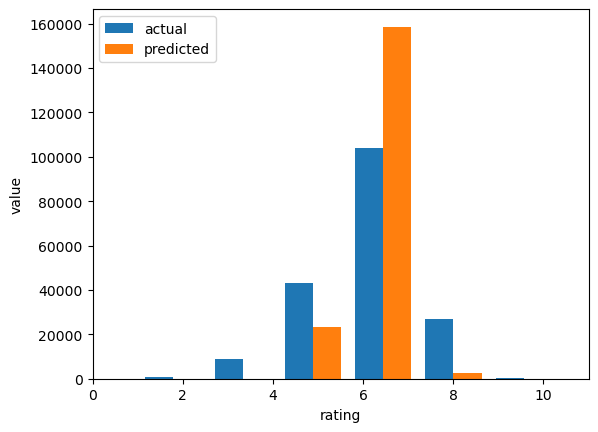

In [63]:
plt.hist([y_test, y_pred], label=['actual', 'predicted'])

plt.xlabel('rating')

plt.xlim(0, 11)

plt.ylabel('value')

plt.legend(loc='upper left')

plt.show()

In [59]:
y_test

387089    5.8
95141     5.3
315199    7.2
398101    6.8
199296    5.4
         ... 
127703    6.7
330546    5.5
178557    6.5
181015    6.5
157440    6.0
Name: rating, Length: 184460, dtype: float64

In [207]:
#x_train

,genres_Horror,genres_Drama,runtime_minutes,Release_year
274880,0,1,165,16
13196,0,0,109,89
172557,0,0,90,8
125207,0,0,100,38
445638,0,0,94,2
...,...,...,...,...
74614,0,0,93,64
382562,0,0,118,4
321320,0,1,89,10
274592,0,0,87,4


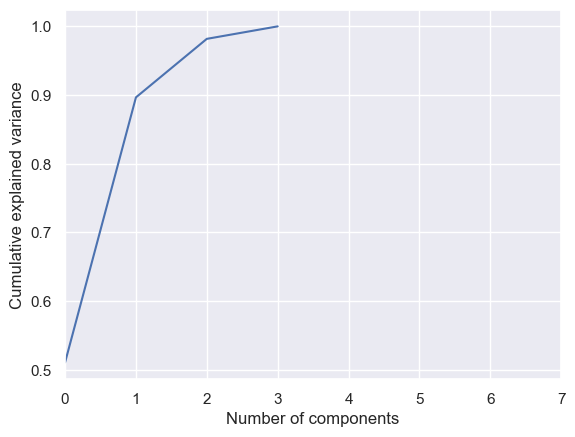

In [209]:
from sklearn.decomposition import PCA

pca = PCA().fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlim(0,7,1)

plt.xlabel('Number of components')

plt.ylabel('Cumulative explained variance')

plt.show() #2 components can explain more than 90% of the variance????

#### Knn Algorithm

In [14]:
from sklearn.neighbors import KNeighborsRegressor

# apply the model
model = KNeighborsRegressor(n_neighbors=5) # 2???

model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

model.score(x_test, y_test)

0.16098924948824933

#### Bayesian Regression

In [15]:
from sklearn.linear_model import BayesianRidge

# apply the model
model = BayesianRidge()

model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

model.score(x_test, y_test)


0.14028747736293834

#### SVM

In [15]:
from sklearn.svm import LinearSVR

# apply the model
model = LinearSVR()

model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

model.score(x_test, y_test)

0.13014242976923873

#### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor

# apply the model
model_DecisionTreeRegressor = DecisionTreeRegressor()

model_DecisionTreeRegressor.fit(x_train, y_train)

# Predict on test set
y_pred = model_DecisionTreeRegressor.predict(x_test)

model_DecisionTreeRegressor.score(x_test, y_test)


0.2675843274312082

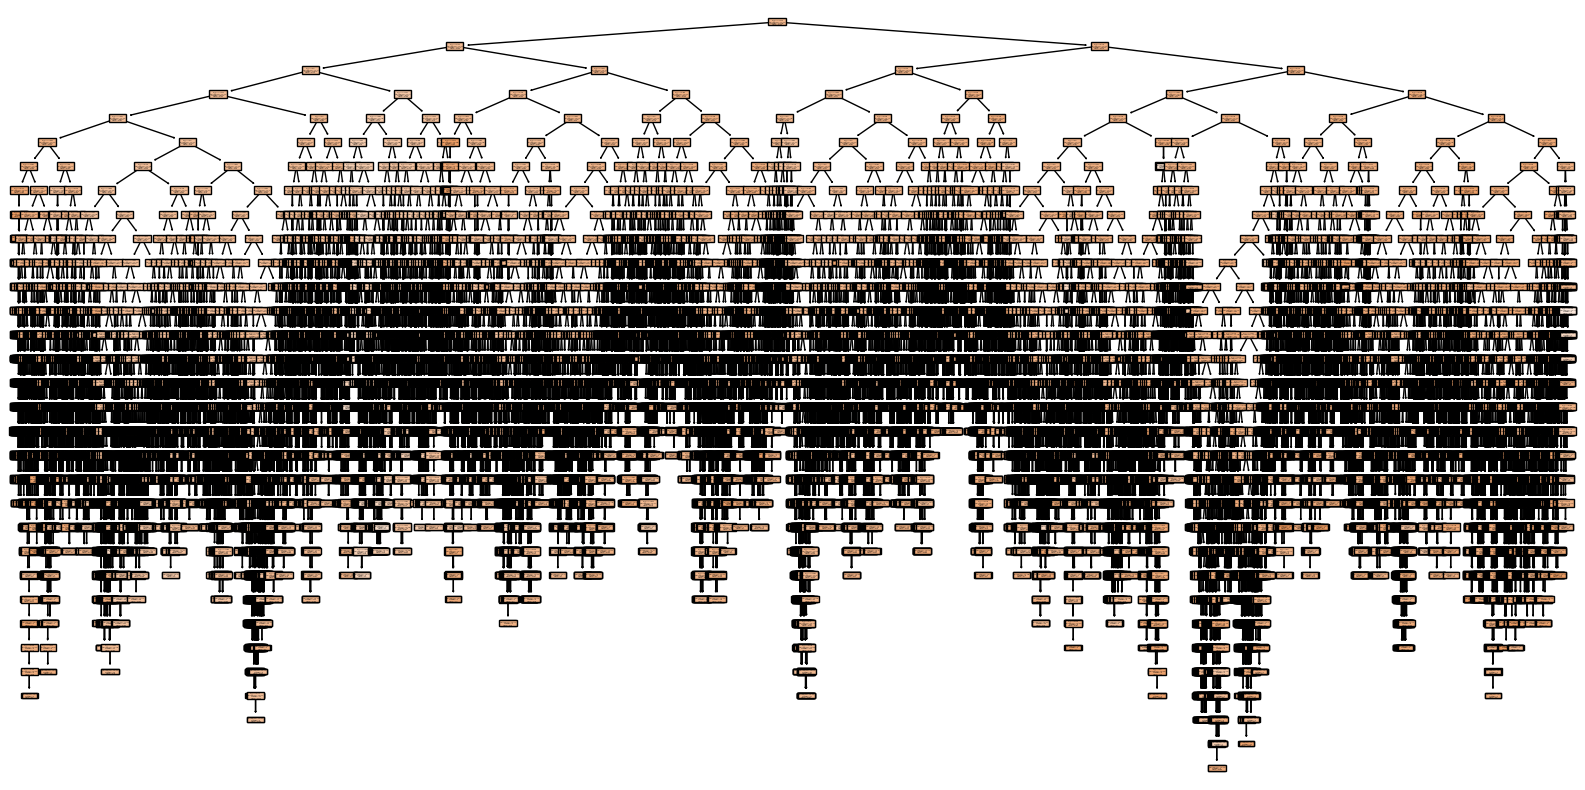

In [26]:
# plot the decision tree
plt.figure(figsize=(20,10))

plot_tree(model_DecisionTreeRegressor, filled=True)

plt.show()

#### Neural Net

In [18]:
from sklearn.neural_network import MLPRegressor

# apply the model
model = MLPRegressor()

model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

model.score(x_test, y_test)

0.19228665135726242

#### SGD

In [19]:
from sklearn.linear_model import SGDRegressor

# apply the model
model = SGDRegressor()

model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

model.score(x_test, y_test)

0.13865359654586795

#### Ensemble

In [86]:
from sklearn.ensemble import RandomForestRegressor

# apply the model
model_RandomForestRegressor = RandomForestRegressor()

model_RandomForestRegressor.fit(x_train, y_train)

# Predict on test set
y_pred_RandomForestRegressor = model_RandomForestRegressor.predict(x_test)

model_RandomForestRegressor.score(x_test, y_test)


0.2633478682824273

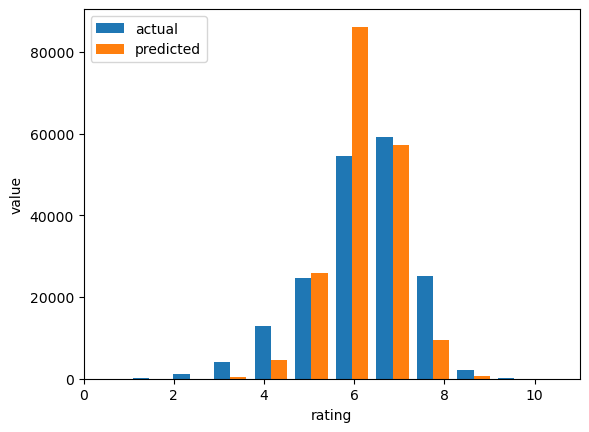

In [87]:
plt.hist([y_test, y_pred_RandomForestRegressor], label=['actual', 'predicted'])

plt.xlabel('rating')

plt.xlim(0, 11)

plt.ylabel('value')

plt.legend(loc='upper left')

plt.show()

#### In here, pick Decision Tree and Ensemble since the scores are the top 2 

In [125]:
bar_df = pd.DataFrame.from_dict(dict(zip(x_train.columns, model_RandomForestRegressor.feature_importances_)), orient = 'index')

bar_df = bar_df.sort_values(by = 0, ascending = False)

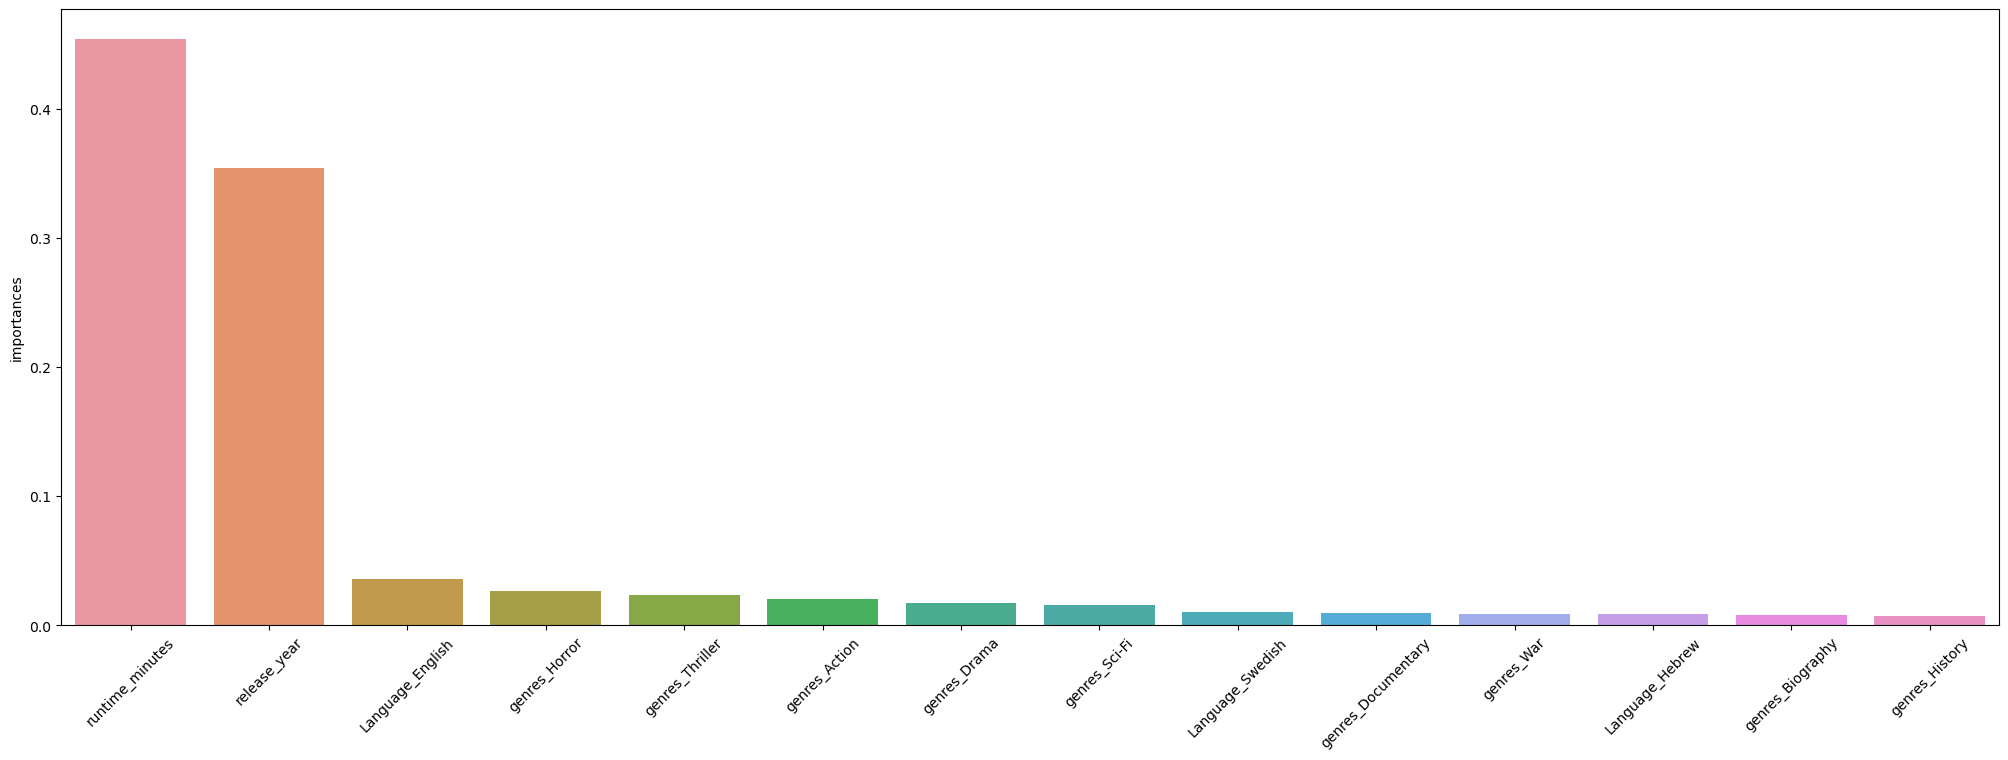

In [126]:
plt.figure(figsize = (25,8))

ax = sns.barplot(data = bar_df, x = bar_df.index, y = 0)

ax.set_ylabel('importances')

ax.tick_params(axis = 'x', labelrotation = 45)

In [95]:
model_RandomForestRegressor.feature_names_in_

array(['runtime_minutes', 'release_year', 'genres_Action',
       'genres_Biography', 'genres_Documentary', 'genres_Drama',
       'genres_History', 'genres_Horror', 'genres_Sci-Fi',
       'genres_Thriller', 'genres_War', 'Language_English',
       'Language_Hebrew', 'Language_Swedish'], dtype=object)

In [99]:
model_RandomForestRegressor.n_features_in_

14

In [161]:
#x_train

,genres_Horror,genres_Drama,runtime_minutes,release_year
274880,0,1,2.587938,0.504404
13196,0,0,0.201950,-2.444954
172557,0,0,-0.607582,0.827621
125207,0,0,-0.181513,-0.384444
445638,0,0,-0.437154,1.070034
...,...,...,...,...
74614,0,0,-0.479761,-1.434900
382562,0,0,0.585412,0.989229
321320,0,1,-0.650189,0.746816
274592,0,0,-0.735403,0.989229


* note:
runtime_minutes
release_year: 2023-release yr
* try all models pick top 2

In [162]:
#x_train.genres_Horror.value_counts()

0    264537
1     12151
Name: genres_Horror, dtype: int64

In [148]:
#y_train

274880    8.3
13196     5.6
172557    6.6
125207    7.5
445638    5.7
         ... 
74614     6.5
382562    4.9
321320    6.9
274592    5.8
130731    5.5
Name: rating, Length: 276688, dtype: float64

In [80]:
from sklearn import linear_model

reg_linear_model = linear_model.LinearRegression()

reg_linear_model.fit(train_data, train_labels)

r2_score = reg_linear_model.score(train_data, train_labels) # gives r2 metric

r2_score

1.0